In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv(r"C:\Users\M M AFRAZ\Downloads\archive (2)\dirty_cafe_sales.csv")

# View basic info
print(df.shape)       # Rows, columns
print(df.info())      # Data types + missing counts
print(df.head())      # First few rows


(10000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB
None
  Transaction ID    Item Quantity Price Per Unit Total Spent  Payment Method  \
0    TXN_1961373  Coffee        2            2.0         4.0     Credit Card   
1    TXN_4977031    Cake        4            3.0        12.0            Cash   
2    TXN_4271903  Cookie        4            1.0       ERROR     Credit Card   
3    TXN_7034554   Salad        2            5.0       

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv(r"C:\Users\M M AFRAZ\Downloads\archive (2)\dirty_cafe_sales.csv")

# Shape of the dataset
print("Shape:", df.shape)

# Data types and null counts
print(df.info())

# First 5 rows
print(df.head())


Shape: (10000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB
None
  Transaction ID    Item Quantity Price Per Unit Total Spent  Payment Method  \
0    TXN_1961373  Coffee        2            2.0         4.0     Credit Card   
1    TXN_4977031    Cake        4            3.0        12.0            Cash   
2    TXN_4271903  Cookie        4            1.0       ERROR     Credit Card   
3    TXN_7034554   Salad        2            5.0

In [3]:
# Step 2 – Replace placeholder values with NaN
placeholders = ["ERROR", "UNKNOWN", "Unknown", "NaN", "nan", ""]

df = df.replace(placeholders, np.nan)

# Also strip whitespace from string columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Preview unique values after cleaning placeholders
print("Unique Payment Methods:", df['Payment Method'].unique())
print("Unique Locations:", df['Location'].unique())
print("Unique Items:", df['Item'].unique())


Unique Payment Methods: ['Credit Card' 'Cash' nan 'Digital Wallet']
Unique Locations: ['Takeaway' 'In-store' nan]
Unique Items: ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' nan 'Sandwich' 'Juice' 'Tea']


C:\Users\M M AFRAZ\AppData\Local\Temp\ipykernel_29628\3571870698.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [4]:
# Step 3 – Convert numeric columns to float
numeric_cols = ['Quantity', 'Price Per Unit', 'Total Spent']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check if conversion worked
print(df[numeric_cols].dtypes)
print(df[numeric_cols].head())


Quantity          float64
Price Per Unit    float64
Total Spent       float64
dtype: object
   Quantity  Price Per Unit  Total Spent
0       2.0             2.0          4.0
1       4.0             3.0         12.0
2       4.0             1.0          NaN
3       2.0             5.0         10.0
4       2.0             2.0          4.0


In [5]:
# Step 4: Standardize categorical text values

# Normalize case (title case) and replace 'UNKNOWN' with NaN
df['Payment Method'] = df['Payment Method'].replace('UNKNOWN', pd.NA).str.title()
df['Location'] = df['Location'].replace('UNKNOWN', pd.NA).str.title()
df['Item'] = df['Item'].replace('Unknown Item', pd.NA).str.title()

# Check unique values after cleaning
print("Payment Methods:", df['Payment Method'].unique())
print("Locations:", df['Location'].unique())
print("Items:", df['Item'].unique())


Payment Methods: ['Credit Card' 'Cash' nan 'Digital Wallet']
Locations: ['Takeaway' 'In-Store' nan]
Items: ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' nan 'Sandwich' 'Juice' 'Tea']


In [6]:
# Step 5: Clean and convert Transaction Date to datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

# Replace placeholder date 1900-01-01 with NaT
df.loc[df['Transaction Date'] == '1900-01-01', 'Transaction Date'] = pd.NaT

# Check results
print(df['Transaction Date'].head(10))
print("Missing dates:", df['Transaction Date'].isna().sum())


0   2023-09-08
1   2023-05-16
2   2023-07-19
3   2023-04-27
4   2023-06-11
5   2023-03-31
6   2023-10-06
7   2023-10-28
8   2023-07-28
9   2023-12-31
Name: Transaction Date, dtype: datetime64[ns]
Missing dates: 460


In [7]:
# Step 6: Handle missing values

# Fill numeric NaNs with median
num_cols = ['Quantity', 'Price Per Unit', 'Total Spent']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical NaNs with 'Unknown'
cat_cols = ['Item', 'Payment Method', 'Location']
df[cat_cols] = df[cat_cols].fillna('Unknown')

# Dates: keep NaT (don't fill)
# If needed: df['Transaction Date'] = df['Transaction Date'].fillna(df['Transaction Date'].mode()[0])

# Verify no more missing except dates
print(df.isna().sum())


Transaction ID        0
Item                  0
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date    460
dtype: int64


In [8]:
# Step 6: Remove rows with missing Transaction Date
df = df.dropna(subset=['Transaction Date']).reset_index(drop=True)

# Verify no missing values remain
print(df.isna().sum())
print(f"New dataset shape: {df.shape}")


Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64
New dataset shape: (9540, 8)


In [9]:
# Step 7: Export cleaned dataset
df.to_csv("cleaned_transactions.csv", index=False)

print("Cleaned dataset exported as 'cleaned_transactions.csv'")


Cleaned dataset exported as 'cleaned_transactions.csv'


In [10]:
# Step 1: Basic EDA Overview

# Shape and column details
print("Dataset Shape:", df.shape)
print("\nColumn Info:")
print(df.info())

# Basic statistics for numeric columns
print("\nDescriptive Statistics:")
print(df.describe())

# Check unique values in categorical columns
categorical_cols = ['Item', 'Payment Method', 'Location']
for col in categorical_cols:
    print(f"\nUnique values in {col}: {df[col].unique()}")

# Check date range
print("\nTransaction Date Range:")
print(df['Transaction Date'].min(), "to", df['Transaction Date'].max())


Dataset Shape: (9540, 8)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9540 non-null   object        
 1   Item              9540 non-null   object        
 2   Quantity          9540 non-null   float64       
 3   Price Per Unit    9540 non-null   float64       
 4   Total Spent       9540 non-null   float64       
 5   Payment Method    9540 non-null   object        
 6   Location          9540 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 596.4+ KB
None

Descriptive Statistics:
          Quantity  Price Per Unit  Total Spent               Transaction Date
count  9540.000000     9540.000000  9540.000000                           9540
mean      3.024109        2.952673     8.868816  2023-

C:\Users\M M AFRAZ\AppData\Local\Temp\ipykernel_29628\811314371.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values, palette="viridis")


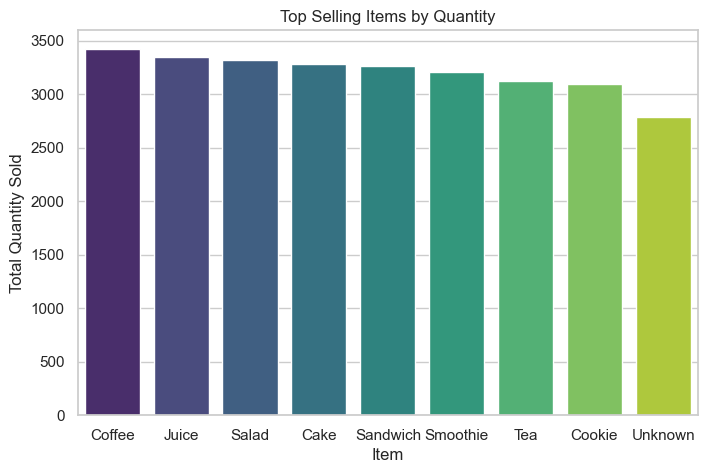

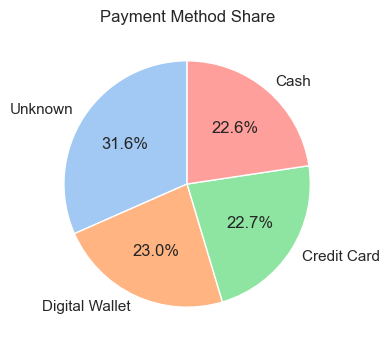

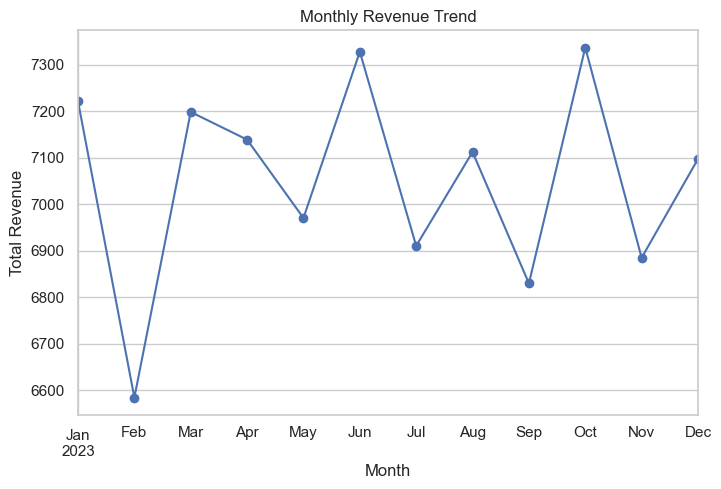

C:\Users\M M AFRAZ\AppData\Local\Temp\ipykernel_29628\811314371.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Total Spent', data=df, estimator=sum, palette="coolwarm")


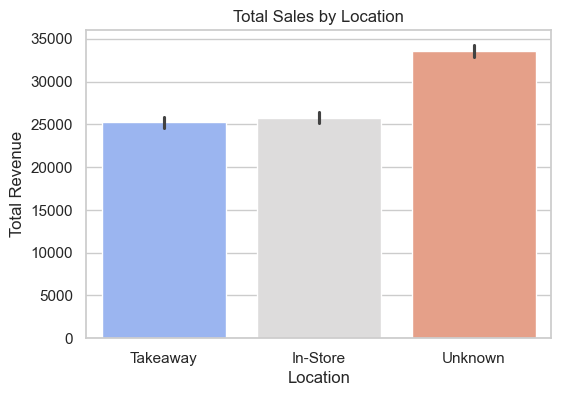

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look clean
sns.set(style="whitegrid")

# 1. Top Selling Items by Quantity
plt.figure(figsize=(8,5))
top_items = df.groupby('Item')['Quantity'].sum().sort_values(ascending=False)
sns.barplot(x=top_items.index, y=top_items.values, palette="viridis")
plt.title("Top Selling Items by Quantity")
plt.ylabel("Total Quantity Sold")
plt.xlabel("Item")
plt.show()

# 2. Payment Method Distribution
plt.figure(figsize=(6,4))
df['Payment Method'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.ylabel("")
plt.title("Payment Method Share")
plt.show()

# 3. Monthly Revenue Trend
df['Month'] = df['Transaction Date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['Total Spent'].sum()
monthly_revenue.plot(kind='line', marker='o', figsize=(8,5))
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

# 4. Sales by Location
plt.figure(figsize=(6,4))
sns.barplot(x='Location', y='Total Spent', data=df, estimator=sum, palette="coolwarm")
plt.title("Total Sales by Location")
plt.ylabel("Total Revenue")
plt.show()


In [12]:
# Step 1: Prepare Data for ML
import pandas as pd
from sklearn.model_selection import train_test_split

# Features and Target
X = df[['Item', 'Quantity', 'Price Per Unit', 'Payment Method', 'Location', 'Transaction Date']]
y = df['Total Spent']

# Convert Transaction Date to numeric features (Year, Month, Day)
X['Year'] = X['Transaction Date'].dt.year
X['Month'] = X['Transaction Date'].dt.month
X['Day'] = X['Transaction Date'].dt.day
X = X.drop('Transaction Date', axis=1)

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['Item', 'Payment Method', 'Location'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (7632, 18)
Test set shape: (1908, 18)


C:\Users\M M AFRAZ\AppData\Local\Temp\ipykernel_29628\3062002498.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Year'] = X['Transaction Date'].dt.year
C:\Users\M M AFRAZ\AppData\Local\Temp\ipykernel_29628\3062002498.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Month'] = X['Transaction Date'].dt.month


In [13]:
# Step 2: Train and Evaluate Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 0.79
Mean Squared Error (MSE): 3.39
Root Mean Squared Error (RMSE): 1.84
R² Score: 0.90


                          Feature  Importance
0                        Quantity    0.463721
1                  Price Per Unit    0.426389
4                             Day    0.030160
3                           Month    0.020949
8                      Item_Salad    0.013137
6                     Item_Cookie    0.006991
11                       Item_Tea    0.005384
17               Location_Unknown    0.005055
15         Payment Method_Unknown    0.004577
16              Location_Takeaway    0.004389
13     Payment Method_Credit Card    0.004038
14  Payment Method_Digital Wallet    0.003894
10                  Item_Smoothie    0.003673
9                   Item_Sandwich    0.003174
12                   Item_Unknown    0.001891
5                     Item_Coffee    0.001761
7                      Item_Juice    0.000817
2                            Year    0.000000


C:\Users\M M AFRAZ\AppData\Local\Temp\ipykernel_29628\3565381359.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


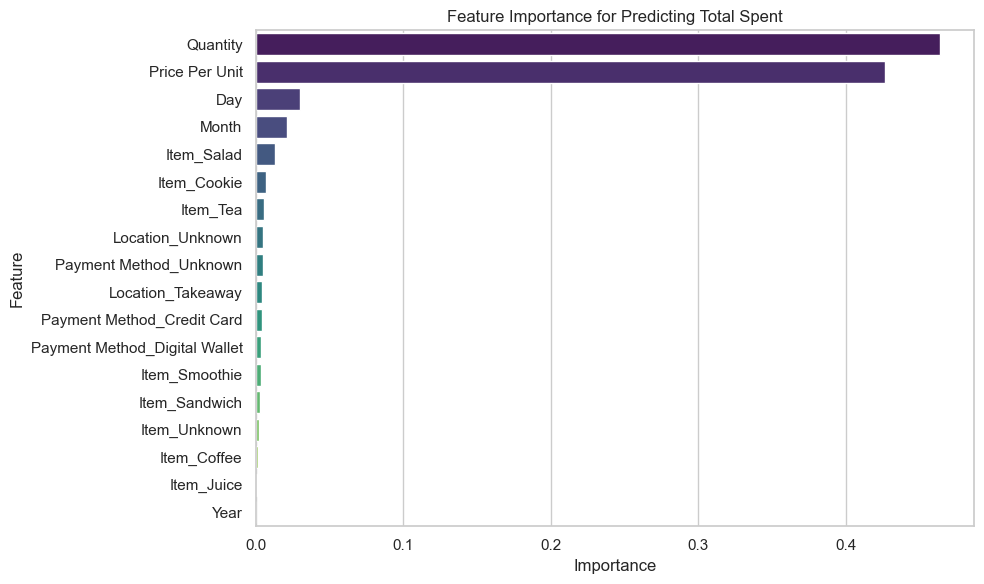

In [14]:
# Step 3: Feature Importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importances)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance for Predicting Total Spent')
plt.tight_layout()
plt.show()


In [15]:
# Step 4: Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='r2'
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score on CV:", grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best R2 Score on CV: 0.9086349394246037


In [16]:
# Step 5: Retrain with Best Parameters
best_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    random_state=42
)

# Train the model
best_model.fit(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


Test R²: 0.9196
MAE: 0.65
RMSE: 1.66


In [19]:
# Save predictions from the ML model
results = X_test.copy()
results['Actual_Total_Spent'] = y_test
results['Predicted_Total_Spent'] = y_pred

results.to_csv("cafe_sales_predictions.csv", index=False)
print("Predictions saved as cafe_sales_predictions.csv")


Predictions saved as cafe_sales_predictions.csv
